<a href="https://colab.research.google.com/github/topguns837/Data_Science_Notebooks/blob/main/Keras_Tuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
!pip install keras-tuner

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kerastuner.tuners import RandomSearch

print("done")

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Keras-Tuner/main/Real_Combine.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [5]:
X = df.iloc[:,:-1]
y = df.iloc[: ,-1]

print(X.shape , y.shape)

(1093, 8) (1093,)


In [ ]:

scaler.fit


In [6]:
X.isnull().sum()

T      0
TM     0
Tm     0
SLP    0
H      0
VV     0
V      0
VM     0
dtype: int64

In [7]:
y.isnull().sum()

1

###Hyperparameters
1. No of hidden layers
2. No of neurons per layer
3. Learning rate

##Template code for Keras-Tuner 

In [32]:
from tensorflow import keras

def model_builder(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=128,
                                            step=16),
                               activation='relu'))
    model.add(keras.layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [33]:
tuner = RandomSearch(
    model_builder ,
    objective = 'val_mean_absolute_error' ,
    max_trials = 5 ,
    executions_per_trial = 3,
    directory = "aqi",
    project_name = "AQI"

)

In [34]:
from sklearn.model_selection import train_test_split

X_train , X_test ,y_train , y_test = train_test_split(X,y)

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
X_trained_scaled = pd.DataFrame(X_train_scaled  ,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns = X_test.columns)

In [37]:
X_trained_scaled.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,0.081035,0.011160,0.223943,0.091183,0.833941,-0.539706,-0.896940,-0.658991
1,-1.848092,-1.961452,-1.680522,0.520452,0.202821,-0.802500,0.669358,1.469434
2,-1.223554,-0.982675,-1.072714,0.882647,0.139709,0.380073,-0.270421,-0.126885
3,1.024780,0.598427,1.236957,-1.102719,0.202821,1.168455,0.799883,0.117596
4,-0.265930,-0.365293,-0.370358,0.788744,-0.049627,-0.802500,-0.896940,-0.658991


In [42]:
X_test_scaled.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,-1.140283,-1.027849,-1.207783,1.097281,0.265933,0.117279,-0.792520,-0.658991
1,-1.403976,-1.524767,-1.491426,1.271671,0.202821,0.511470,0.121154,0.117596
2,0.691694,0.402671,0.885779,-1.371011,1.086389,0.511470,0.121154,0.376459
3,0.608422,0.508078,0.885779,-0.606377,0.960165,-0.539706,-1.236305,-1.162335
4,0.719451,0.477962,1.047861,-1.303938,0.770829,-0.145515,-0.113791,-0.126885


In [41]:
tuner.search(X_train_scaled , y_train , epochs = 20 , validation_data = (X_test_scaled,y_test))

Trial 5 Complete [00h 00m 24s]
val_mean_absolute_error: nan

Best val_mean_absolute_error So Far: nan
Total elapsed time: 00h 03m 15s
INFO:tensorflow:Oracle triggered exit


In [43]:
print(tuner.results_summary())

Results summary
Results in aqi/AQI
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 18
units_0: 128
units_1: 48
learning_rate: 0.01
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
units_16: 32
units_17: 32
Score: nan
Trial summary
Hyperparameters:
num_layers: 16
units_0: 128
units_1: 80
learning_rate: 0.0001
units_2: 80
units_3: 96
units_4: 96
units_5: 112
units_6: 96
units_7: 112
units_8: 112
units_9: 112
units_10: 48
units_11: 80
units_12: 96
units_13: 32
units_14: 112
units_15: 64
units_16: 128
units_17: 112
Score: nan
Trial summary
Hyperparameters:
num_layers: 15
units_0: 112
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 112
units_4: 64
units_5: 80
units_6: 80
units_7: 64
units_8: 96
units_9: 80
units_10: 48
units_11: 80
units_12: 32
units_13: 80
units_14: 96
units_15: 64
units_16: 112
units_17: 112
Score: nan
Trial summary
Hyperpar

In [13]:
'''Trial summary
Hyperparameters:
num_layers: 8
units_0: 512
units_1: 448
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32'''

'Trial summary\nHyperparameters:\nnum_layers: 8\nunits_0: 512\nunits_1: 448\nlearning_rate: 0.001\nunits_2: 32\nunits_3: 32\nunits_4: 32\nunits_5: 32\nunits_6: 32\nunits_7: 32'

In [46]:
# Set seed
tf.random.set_seed(42)

# Make model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(512 , activation = "relu") ,
                             tf.keras.layers.Dense(448 , activation = "relu") ,
                             tf.keras.layers.Dense(32 , activation = "relu") ,
                             tf.keras.layers.Dense(32 , activation = "relu") ,
                             tf.keras.layers.Dense(32 , activation = "relu") ,
                             tf.keras.layers.Dense(32 , activation = "relu") ,
                             tf.keras.layers.Dense(32 , activation = "relu") ,
                             tf.keras.layers.Dense(32 , activation = "relu") ,
                             tf.keras.layers.Dense(1 , activation = "linear")
])

#Compile Model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = "mean_absolute_error" ,
    metrics = "mean_absolute_error")

#Train Model
history = model.fit(X_train , y_train , epochs = 100 , 
                    validation_data = (X_test , y_test))

Epoch 1/100
26/26 [==============================] - 2s 24ms/step - loss: 69.3356 - mean_absolute_error: 69.3356 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/100
26/26 [==============================] - 0s 11ms/step - loss: 65.5428 - mean_absolute_error: 65.5428 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3/100
26/26 [==============================] - 0s 11ms/step - loss: 64.2490 - mean_absolute_error: 64.2490 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4/100
26/26 [==============================] - 0s 11ms/step - loss: 63.4131 - mean_absolute_error: 63.4131 - val_loss: nan - val_mean_absolute_error: nan
Epoch 5/100
26/26 [==============================] - 0s 12ms/step - loss: 64.2262 - mean_absolute_error: 64.2262 - val_loss: nan - val_mean_absolute_error: nan
Epoch 6/100
26/26 [==============================] - 0s 10ms/step - loss: 60.9988 - mean_absolute_error: 60.9988 - val_loss: nan - val_mean_absolute_error: nan
Epoch 7/100
26/26 [=====================

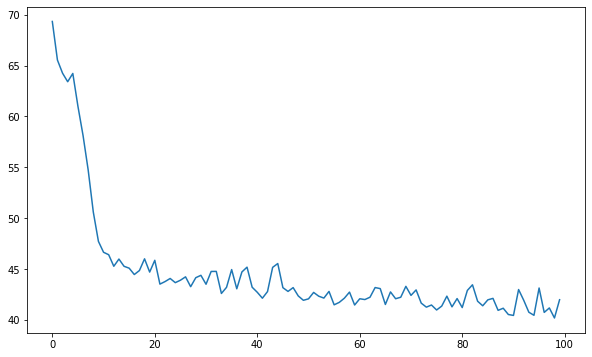

In [47]:
plt.figure(figsize = (10,6))
plt.plot(history.history["loss"])
plt.show()

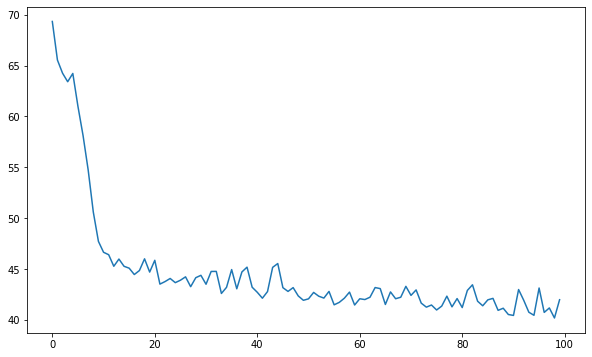

In [50]:
plt.figure(figsize = (10,6))
plt.plot(history.history["mean_absolute_error"])
plt.show()